# Homework 3 - Find the perfect place to stay in Texas!

The homework consists of analyzing the text of Airbnb property listings and building a search engine. In order to have the best realization of this search engine, we are going to upload some libraries that will help us in our work.

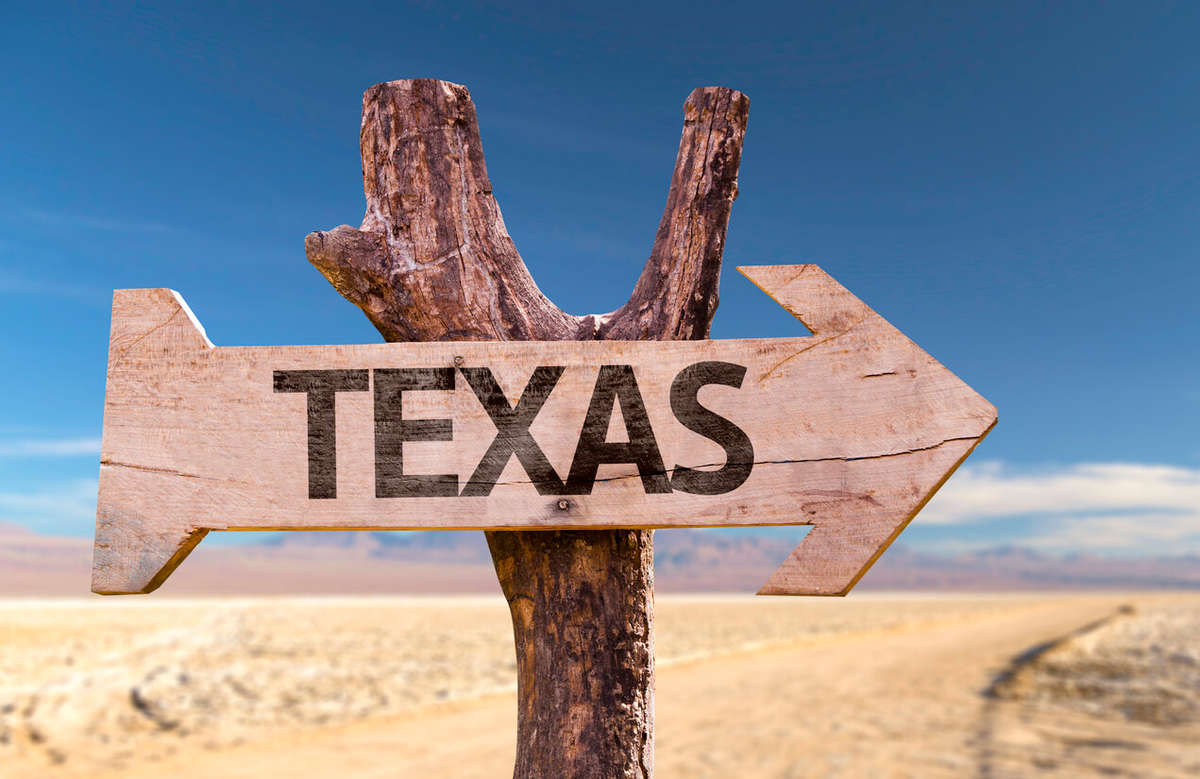

In [1]:
from IPython.display import Image
Image("texas.jpeg",height=4,width=350)

# Libraries

In [2]:
import pandas as pd
import numpy as np

from collections import defaultdict
from collections import OrderedDict
import functions
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer

from sklearn.metrics.pairwise import cosine_similarity
from heapq import heappush, nlargest
import pickle

from ipywidgets import widgets
import folium
from geopy import distance

In [3]:
import importlib
importlib.reload(functions)

<module 'functions' from 'C:\\Users\\Dusica\\ADMThirdHomework\\functions.py'>

The most important thing to consider for building our search engine is the data. So first we have to preprocess all the data in a way that our search engine will be more efficient as possible. We have to clean the data frame, removing NaN values for the following categories:

* rate_par_night: NaN values are imputed with 0 and converted to an integer type
* description, title, latitude, and longitude: NaN values are replaced with "unknown"

Then we check where _bedrooms_count_ doesn't have a value and save indexes of those records to a list in order to possibly impute it with the right value. Because, if the word studio is mentioned in the description, then it is a studio, otherwise it is "unknown".

Since it could be possible that there are duplicates, they are removed by using the base part of their URL.

Each record of the dataset was created as a separate .tsv file representing every single document.

Afterward, all the documents(description+title) were preprocessed by removing stopwords, punctuation and stemming.

# Step 1: Data

In [4]:
#import airbnb data

In [5]:
airbnb_data=pd.read_csv("Airbnb_Texas_Rentals.csv",usecols=['average_rate_per_night', 'bedrooms_count', 'city',
       'date_of_listing', 'description', 'latitude', 'longitude', 'title','url'],parse_dates=['date_of_listing'])

In [6]:
airbnb_data.columns

Index(['average_rate_per_night', 'bedrooms_count', 'city', 'date_of_listing',
       'description', 'latitude', 'longitude', 'title', 'url'],
      dtype='object')

# Step 2: Create documents

In [7]:
airbnb_data.head(2)

,average_rate_per_night,bedrooms_count,city,date_of_listing,description,latitude,longitude,title,url
0,$27,2,Humble,2016-05-01,Welcome to stay in private room with queen bed...,30.020138,-95.293996,2 Private rooms/bathroom 10min from IAH airport,https://www.airbnb.com/rooms/18520444?location...
1,$149,4,San Antonio,2010-11-01,"Stylish, fully remodeled home in upscale NW – ...",29.503068,-98.447688,Unique Location! Alamo Heights - Designer Insp...,https://www.airbnb.com/rooms/17481455?location...


In [8]:
airbnb_data.shape

(18259, 9)

# Clean data

In [9]:
#Checking null values of the dataset
airbnb_data.isnull().sum()
#average_rate_per_night -> replace NAN with 0, convert to int
#bedrooms_count -> There are only 3 records so we decided to replace NAN with a category based on the desciption if it's possible. 
#description, latitude, longitude, title -> replace NAN to 'Unknown'

average_rate_per_night    28
bedrooms_count             3
city                       0
date_of_listing            0
description                2
latitude                  34
longitude                 34
title                      3
url                        0
dtype: int64

In [10]:
#After cleaning the data there aren't any NaN values anymore
airbnb_data=functions.clean(airbnb_data)
airbnb_data.isnull().sum()

average_rate_per_night    0
bedrooms_count            0
city                      0
date_of_listing           0
description               0
latitude                  0
longitude                 0
title                     0
url                       0
dtype: int64

In [11]:
airbnb_data.shape

(11532, 9)

This method is run only once at the beginning to make separate .tsv files
functions.create_tsv_documents(airbnb_data)

# Preprocessing

All the documents were preprocessed by

1) Removing stop words

2) Removing punctuation

3) Stemming

4) Lower case

# Step 3: Search Engine

In this step, we are actually going to build our search engine. The most necessary thing for building a search engine is to create a structure called inverted index, which is designed to allow very fast full-text searches. An inverted index consists of a list of all the unique words that appear in the documents, and for each word, a list of the documents in which it appears. To create an inverted index, we first split the content field of each document into separate words (which we call terms or tokens), create a sorted list of all the unique terms and the list in which documents each term appears. Before building the index, we will create a file named vocabulary that maps each word to an integer (term_id). Then we will create our inverted index.

# 3.1) Conjunctive query

## 3.1.1) Create your index!

In this first Conjunctive query the goal is that, given a query, the search engine is supposed to return a list of documents. Since we are dealing with **conjunctive queries** (AND), each of the returned documents should contain **all the words** in the query. The final output, as requested, will return for each document the following information: _Title, Description, City and Url_.

In [12]:
#These methods are called only once when the vocabulary was created and to save the vocabulary in a file.

###### Building a vocabulary
vocabulary,doc_vocabs=functions.build_vocabulary(airbnb_data)
len(vocabulary) #11717

###### Saving vocabulary as a dictionary into a "vocabulary.p" file
pickle.dump(vocabulary, open("vocabulary.p", "wb"))   

# Compute an inverted index

In [13]:
#These methods are called only once when the first inverted index was created and are necessary to save it into a file.

###### Computing an inverted index
inverted_idx=functions.compute_inverted_idx(doc_vocabs,vocabulary)
###### Saving inverted index  as a dictionary into a "inverted_idx.p" file
pickle.dump(inverted_idx, open("inverted_idx.p", "wb"))   

In [14]:
#Load vocabulary and inverted index in memory from the files that were previously saved as pickle files

In [15]:
vocabulary = pickle.load(open("vocabulary.p", "rb"))
inverted_idx = pickle.load(open("inverted_idx.p", "rb"))

# 3.1.2) Execute the query

In [17]:
doc_id_rs,result_df=functions.search_engine(vocabulary,inverted_idx) #private bedroom internet hot tub
result_df

private bedroom internet hot tub


,title,description,city,url
0,Pool/Hot Tub - 3 Room Suite - Private Bathroom,"Two bedrooms, a sitting room &amp; a private bathroom! (2 real beds, a sofa bed &amp; 3 air mattresses) The entire upstairs of my house! (My wife and I live downstairs) A continental breakfast is included (fresh fruit, cereal, milk, coffee bar, snacks, microwave.)\n25 min to downtown Dallas / 30 minutes to AT&amp;T Stadium\n\nSwim in the pool! Sit and soak in the hot tub (by the glow of Tiki torches). Connect with WiFi &amp; Internet. Enjoy movies and programing, in your private rooms, on DirecTV and NETFLIX.",DeSoto,https://www.airbnb.com/rooms/12791862
1,GREAT RENT HOUSE FOR SUPERBOWL,"SUPERBOWL 2017 DREAM VACATION HOUSE!!!\n4 bedroom, 2 bathroom house for rent. Water front. 30 minute drive to the NRG stadium for the Super bowl. Full access to entire house, including kitchen. We have a house next door so we will be available at all times. \n***pictures show house before it's finished. I will post progress pictures as we finish up the redecorating. ***stay three nights, get the fourth night for free or stay a week for a flat rate of $5000. A REFUNDABLE security deposit of $seven-hundred dollars. \nLand Rover available for $75/hr for driver or $399/day. \n\nAMENITIES\n-access to private pool and hot tub\n-stocked kitchen available for use \n-water front view \n-washer and dryer\n-car available for additional rates \n-internet and cable\n\nAvailable for interaction 24/7\n\nVery spacious. 2 acres of land.",Highlands,https://www.airbnb.com/rooms/16558556
2,"Bay view condo with pool , boat dock sleeps 5-6","The modern newly remodeled Tortuga Bay Bay front Condo with private boat dock offers 2 Bedrooms, (Sleeps up to 6) 2 Full Baths, Resort Pool, Hot Tub, Breathtaking Bayfront Balcony, Full Size-Fully Equipped Kitchen, LCD TVs, Wi-Fi , and so Much More than the Mind Can Conceive!\n\n2 Bedrooms (2-Queen Beds, 2-Twin Beds)\nBay front Balcony, Fully Equipped Kitchen, Washer and Dryer\n3 LCD HDTV\nBroadband Internet and Wi-Fi throughout\nResort Pool and Hot Tub \nPrivate Boat Dock, Outstanding Bay Views",South Padre Island,https://www.airbnb.com/rooms/18813079
3,Estrella del Lago (Star of the Lake) Waterfront Lake House with Hot Tub,"Welcome to the beautiful waterfront lake house with water access! This home known as Estrella Del Lago (Star of the Lake) is a 2 story 3 bedroom, 2 and a half bathroom home situated along the pristine shores of Canyon Lake to provide a relaxing retreat and act as a meeting place for friends and family.\nPull up in your boat or jet skis and drop anchor as the property is located in a quiet area is perfect for swimming, fishing, and kayaking (provided - use at your own risk) on the clear blue water. \nA fully equipped kitchen hosts cooking for the whole family. The home bellies a cozy atmosphere with tall ceilings, comfy beds, furnishings, and relaxing environment. You can enjoy a view from just about every room inside the home and the private covered porches which provide plenty of seating, a Gas Grill, a Firepit, and other outdoor furnishings. The main level features an open concept living with a large deck that is an extension of the home. The living room, dining area, kitchen, and a bedroom are on the main floor. \nIn the lower level you will find a guest area with two bedrooms and a full bathroom which provide plenty of sleeping (2 full size bed bunk beds and Queen bed), a second deck with a hot tub, and fire pit are right off the lower level guest rooms. Other amenities include: Time Warner (Spectrum) cable, High Speed Internet, HBO, Showtime, BluRay DVD Player, Multiple TVs, board games and many more.\nPlease visit our to check rates, availability, and other properties. Gruene, and Canyon Lake are famous for their abundance of country music shows, dinner eateries, theater venues, and shopping. Once visitors have had their fill of this part of the Texas Hill Country, they can take a trip to New Braunfels, Schlitterbahn a s

# 3.2) Conjunctive query & Ranking score 

## 3.2.1) Inverted index 

### Calculation of tf-idf values

In this second part, given a query, we want to get the top-5 documents related to the query. In particular we will find all the documents that contain all the words in the query as before, sort them by their similarity with the query and return in output 5 documents. We are using a heap data structure for maintaining the top-5 documents.

We will use the tfidf score and cosine similarity to do this.

**TFIDF**

Tf-idf is a weighting scheme that assigns each term in a document a weight based on its term frequency (tf) and inverse document frequency (idf). The terms with higher weight scores are considered to be more important. It’s one of the most popular weighting schemes in Information Retrieval.

How will we use the tf-idf score? We will create a new inverted index and for each word, we have the list of documents in which it is contained in, and the relative tf-idf score. Considered that the tf is basically the number of occurrences of the term in the document, while the Idf is the inverse document frequency. Let’s first see what document frequency is. The document frequency of a term t is the number of documents containing the term: the idf of a term is the number of documents in the corpus divided by the document frequency of a term.

We can precalculate the tfIdf values because their values are invariant with the respect to the query.

Once we got the right set of documents, we will know which ones are the most similar according to the query by using a scoring function. In this particular case, the scoring function we are required to use is the Cosine Similarity, with respect to the tfIdf representation of the documents to rank them.

Let's take a step back and think as each document as a vector, we want to calculate their similarity score.

The similarity score between two vectors in a vector space is the angle between them. If two documents are similar they will be close to each other in the vector space, having a small angle in between. So given the vector representation of the documents, how do we compute the angle between them? We can do it very easily if the vectors are already normalized, which is true in our case, and this technique is called cosine similarity. We take the dot product of the vectors and the result is the cosine value of the angle between them. When the angle is smaller its cosine value is larger, so when two vectors are similar their cosine similarity value will be larger. This gives us a great similarity metric with higher values meaning more similar and lower values meaningless. Therefore, if we compute the cosine similarity between the query vector and all the document vectors, sort them in descending order, and select the documents with top similarity, we will obtain an ordered list of relevant documents to this query. In this case, cosine_similarity library was used after the tf_idf calculations were done. 

In [18]:
#These methods are called only once, when the second inverted index was created and to save it into a file.

tf_idf_dic=functions.calculate_tf_idf(airbnb_data,inverted_idx,vocabulary)

inverted_idx2=functions.compute_inverted_idx2(inverted_idx,vocabulary,tf_idf_dic)

pickle.dump(inverted_idx2, open("inverted_idx2.p", "wb"))  # save it into a file # for future usage it can be just imported 

## 3.2.2) Execute the query

So, as said before, this Search Engine is supposed to return a list of documents, ranked by their Cosine Similarity with respect to the query entered in the input. More precisely, the output must contain Title, Description, City, Url and the similarity score of the documents with respect to the query. 

In [19]:
#Load second inverted index in memory

In [20]:
inverted_idx2 = pickle.load(open("inverted_idx2.p", "rb"))

In [21]:
functions.search_engine2(5,vocabulary,inverted_idx,inverted_idx2) # sun private room

sun private room
[2569, 269, 13205, 2847, 8997, 3367, 8872, 8747, 6705, 4405, 7102, 12867, 8140, 13773, 5454, 6875, 11362, 2151, 872, 1899, 12024]


,title,description,city,url,similarity
0,Spacious Private guest room w/sunroom - woman only,"3 minute drive to Mopac and 15 minutes to Downtown, close to Bike Trails and Lady Bird Johnson's Bird Park. My place is a 5 minute walk to boutique-style Escarpment Village Shopping with grocery, a Starbucks, higher end dining, or grab an ice cream or burger.\n\nYoull enjoy the coziness of the private master bedroom, private bath, and French door entry to the sun room, with view of beautiful trees in backyard. My place is great for couples, solo adventurers, or business travelers.",Austin,https://www.airbnb.com/rooms/18868758,0.97
1,Private Room in Warm Boutique Home,"Congratulations on finding the perfect place to stay. We have a Private room with a ceiling fan, full size closet, wireless access, access to swimming pool, washer and dryer, private patio for relaxing in the shade or laying out in the sun, close to Hwy (PHONE NUMBER HIDDEN), and the Dell Campus. austin is 15 minutes away and COTA is 30 minutes.",Round Rock,https://www.airbnb.com/rooms/7672843,0.97
2,"Cozy/Private Room, Minutes to Downtown!","Cozy private room, very close to the airport and 7 miles from downtown Austin. The room is simple but equipped with everything you would need for a comfortable stay. Double bed, two bed side tables, full closet to tuck away your belongings in. The full bath is shared with another air bnb listing. Bathroom has toiletries and hairdryer. Feel free to use our living room, dining area and kitchen. We also have a nice back patio great for soaking up sun or night drinking.",Austin,https://www.airbnb.com/rooms/17423956,0.97
3,"Comfy, Quiet Private Room with Late Check-Out","Our place is very quiet and clean. Comfy queen sized bed and black-out curtain on the window so you can sleep in without with sun waking you.\n\nWe are off the beaten path, in a quiet neighborhood east of Austin. A short drive 15-30 minutes (depending on where you are headed and when) to a ton of great Austin sites and sounds. \n\nOur place is perfect if you are looking for a comfortable, clean, quiet private room.",Austin,https://www.airbnb.com/rooms/16827574,0.96
4,Quiet Getaway Near I-35/UNT/TWU!!,"Book Your Group at One Location and Save!!\nVideo Tour Available Upon Request\n\n-1 min highway access located on a quiet cul-de-sac\n-4 Bright, sun-lit, comfy, private secured guest rooms \n-2 Full bathrooms \n-40'' TV in Room with Roku/Apple TV Access\n-Entertainment-centric child-free pet-free comfort setting\n-DIRECTV + NFL Sunday Ticket\n-Living room with 70'' TV\n-Driveway parking available\n\nConnect with me on my LinkedIn page:\nSearch for Grant Glass",Denton,https://www.airbnb.com/rooms/15609235,0.92


# 4) Step 4: New score!

Now it's our turn. We want to come up with an idea on how to rank the houses based on the queries of Airbnb users. In this case, a single user can give as input more information than the single textual query, so we will take into account all the information and think on how to answer to the user's requests.

As a starting point, we will get the query-related documents by exploiting the search engine on step 3.1. Then, once we have the documents, we need to sort them according to our new score. 

Our output will contain: title, description, city and location.  

#### Description of our new score -> _BR score_

Price is the factor that is of great significance to all the users.( Price is the factor that has the biggest impact on the accomodation choice for all the users) Everyone, according to his budget, wants to find a cheaper deal in order to save more money. That's why if the price is lower than the one the user put in the query, it will get a bigger score. A small value of score(0.05) is also assigned if the price is only to 100$ bigger, so those results show up before the more expensive ones.

Also the number of bedrooms is something of great importance to the users, because everyone wants to get more important result sets at the beginning of the result output of the search engine. Based on the value that user inputs, the score that will be assigned depends. (The score that will be assigned depends on the base of the value that each user inputs.) It is important that results that match the number of bedrooms user enters will be at the beginning of the list, so the weight that was assigned to that attribute is 0.25 only if it exactly matches the input number, otherwise it is 0.

Basically, our score considers two attributes:  _average_rate_per_night_ and _bedrooms_count_. Based on the following rules for _average_rate_per_night_,_bedrooms_count_, average rate and the number of bedrooms user choose in the additional questions "B score" and "R score" respectively, are calculated depending on the below-mentioned rules. 

Rules of the new scoring function:

*R score rules
    1. if 0=<average_rate_per_night<=chosen_avg_price/2 score is 0.45
    2. else if chosen_avg_price/2<average_rate_per_night<=chosen_avg_price score is 0.25
    3. else if chosen_avg_price<average_rate_per_night<=chosen_avg_price+101 score is 0.05
    
*B score rule
    4. if 'bedrooms_count' is equal to the chosen_no_rooms is 0.25 

Furthermore, BR score is just a sum of B and R score.
**BR score = B score + R score**

BR score has a value from 0-1, whereby 0 means that result is less related to the user's additional input, and 1 means it is of greater significance and should be presented at the top of the result set.
If some results have the same score they will be assigned the same rank. 

#### Example of "BR score" calculation

In [22]:
#example of how the new scoring function works
user_input,explanatory_df=functions.example_score()
print('User input: \n',user_input)
explanatory_df

User input: 
    chosen_avg_price  chosen_no_rooms
0  150               3              


,bedrooms_count,B score,average_rate_per_night,R score,BR score
0,2,0.00,50,0.45,0.45
1,3,0.25,100,0.25,0.50
2,3,0.25,250,0.05,0.30
3,4,0.00,550,0.00,0.00


In [23]:
#QUERY same as from the 1st search engine
#used keywords: private bedroom internet hot tub

In [24]:
result_df 

,title,description,city,url
0,Pool/Hot Tub - 3 Room Suite - Private Bathroom,"Two bedrooms, a sitting room &amp; a private bathroom! (2 real beds, a sofa bed &amp; 3 air mattresses) The entire upstairs of my house! (My wife and I live downstairs) A continental breakfast is included (fresh fruit, cereal, milk, coffee bar, snacks, microwave.)\n25 min to downtown Dallas / 30 minutes to AT&amp;T Stadium\n\nSwim in the pool! Sit and soak in the hot tub (by the glow of Tiki torches). Connect with WiFi &amp; Internet. Enjoy movies and programing, in your private rooms, on DirecTV and NETFLIX.",DeSoto,https://www.airbnb.com/rooms/12791862
1,GREAT RENT HOUSE FOR SUPERBOWL,"SUPERBOWL 2017 DREAM VACATION HOUSE!!!\n4 bedroom, 2 bathroom house for rent. Water front. 30 minute drive to the NRG stadium for the Super bowl. Full access to entire house, including kitchen. We have a house next door so we will be available at all times. \n***pictures show house before it's finished. I will post progress pictures as we finish up the redecorating. ***stay three nights, get the fourth night for free or stay a week for a flat rate of $5000. A REFUNDABLE security deposit of $seven-hundred dollars. \nLand Rover available for $75/hr for driver or $399/day. \n\nAMENITIES\n-access to private pool and hot tub\n-stocked kitchen available for use \n-water front view \n-washer and dryer\n-car available for additional rates \n-internet and cable\n\nAvailable for interaction 24/7\n\nVery spacious. 2 acres of land.",Highlands,https://www.airbnb.com/rooms/16558556
2,"Bay view condo with pool , boat dock sleeps 5-6","The modern newly remodeled Tortuga Bay Bay front Condo with private boat dock offers 2 Bedrooms, (Sleeps up to 6) 2 Full Baths, Resort Pool, Hot Tub, Breathtaking Bayfront Balcony, Full Size-Fully Equipped Kitchen, LCD TVs, Wi-Fi , and so Much More than the Mind Can Conceive!\n\n2 Bedrooms (2-Queen Beds, 2-Twin Beds)\nBay front Balcony, Fully Equipped Kitchen, Washer and Dryer\n3 LCD HDTV\nBroadband Internet and Wi-Fi throughout\nResort Pool and Hot Tub \nPrivate Boat Dock, Outstanding Bay Views",South Padre Island,https://www.airbnb.com/rooms/18813079
3,Estrella del Lago (Star of the Lake) Waterfront Lake House with Hot Tub,"Welcome to the beautiful waterfront lake house with water access! This home known as Estrella Del Lago (Star of the Lake) is a 2 story 3 bedroom, 2 and a half bathroom home situated along the pristine shores of Canyon Lake to provide a relaxing retreat and act as a meeting place for friends and family.\nPull up in your boat or jet skis and drop anchor as the property is located in a quiet area is perfect for swimming, fishing, and kayaking (provided - use at your own risk) on the clear blue water. \nA fully equipped kitchen hosts cooking for the whole family. The home bellies a cozy atmosphere with tall ceilings, comfy beds, furnishings, and relaxing environment. You can enjoy a view from just about every room inside the home and the private covered porches which provide plenty of seating, a Gas Grill, a Firepit, and other outdoor furnishings. The main level features an open concept living with a large deck that is an extension of the home. The living room, dining area, kitchen, and a bedroom are on the main floor. \nIn the lower level you will find a guest area with two bedrooms and a full bathroom which provide plenty of sleeping (2 full size bed bunk beds and Queen bed), a second deck with a hot tub, and fire pit are right off the lower level guest rooms. Other amenities include: Time Warner (Spectrum) cable, High Speed Internet, HBO, Showtime, BluRay DVD Player, Multiple TVs, board games and many more.\nPlease visit our to check rates, availability, and other properties. Gruene, and Canyon Lake are famous for their abundance of country music shows, dinner eateries, theater venues, and shopping. Once visitors have had their fill of this part of the Texas Hill Country, they can take a trip to New Braunfels, Schlitterbahn a s

In [25]:
#documents containing the keywords user entered in the first query
doc_id_rs

[544, 2022, 9099, 5806, 12787]

### Now, we want to extract some additional information from the user using jupyter widget:

In [26]:
print("How many bedrooms would you preffer?")

available_room_number=functions.calculate_room_nums(doc_id_rs)
w1=widgets.ToggleButtons(
    options=available_room_number,
    description='# of rooms:',
    disabled=False,
    button_style='info',#, # 'success', 'info', 'warning', 'danger' or ''
      )
w1

How many bedrooms would you preffer?


A Jupyter Widget

In [27]:
print("What price per night would you preffer?")

w2=widgets.FloatText(
    value=150,
    description='Price ($):',
    disabled=False
)
w2

What price per night would you preffer?


A Jupyter Widget

Ipywidgets were used for extracting additional information about user desires and not a regular input, which is a reason it doesn't appear on the uploaded version. Therefore, these next two following cells just show the image of those questions.

In order to see jupyter widget: type 'jupyter nbextension enable --py widgetsnbextension --sys-prefix' in anaconda navigator

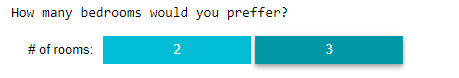

In [28]:
Image("q1.png")

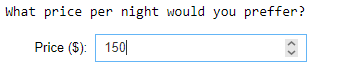

In [29]:
Image("q2.png")

In [36]:
#process_first_question
chosen_no_rooms=w1.get_interact_value()
#process_second_question
chosen_avg_price=w2.get_interact_value()
"""
method that is used for creating list of BR scores for each result row and 
heapified list of tuples 

Input:  doc_id_rs - list of document id's of the results from the first query
        chosen_avg_price - price user chose in the additional question
        chosen_no_rooms - number of rooms user chose in the additional question
Output: score_lst - list of scores with calculated BR score for each row in the result set
        heapified_tuples - heapified list of tuples where ->tuple(BR_score,document_id)
"""
score_lst,heapified_tuples=functions.new_score(doc_id_rs,chosen_avg_price,chosen_no_rooms)

In [37]:
heapified_tuples

[(0, 12787), (0.05, 9099), (0.25, 2022), (0.7, 544), (0.25, 5806)]

In [38]:
#if the BR score is the same, the rank is also the same, cause they have the same significance to the user

In [39]:
"""
method that is used for sorting BR scores and creating ranks for the result dataframe

Input:  heapified_tuples - heapified list of tuples where ->tuple(BR_score,document_id)
Output: ranking_dict - dictionary(key=doc_id,value=rank)
"""
ranking_dict=functions.ranking_BR_score(heapified_tuples)
ranking_dict

OrderedDict([(544, 1), (5806, 2), (2022, 2), (9099, 3), (12787, 4)])

In [40]:
df=functions.finalize_output(list(ranking_dict.keys()))
df['ranking']=ranking_dict.values()

In [41]:
#make the order of columns as follows and set the column ranking as index
df[['ranking','title','description','city','url']]
df.set_index('ranking')

,title,description,city,url
ranking,,,,
1,Pool/Hot Tub - 3 Room Suite - Private Bathroom,"Two bedrooms, a sitting room &amp; a private bathroom! (2 real beds, a sofa bed &amp; 3 air mattresses) The entire upstairs of my house! (My wife and I live downstairs) A continental breakfast is included (fresh fruit, cereal, milk, coffee bar, snacks, microwave.)\n25 min to downtown Dallas / 30 minutes to AT&amp;T Stadium\n\nSwim in the pool! Sit and soak in the hot tub (by the glow of Tiki torches). Connect with WiFi &amp; Internet. Enjoy movies and programing, in your private rooms, on DirecTV and NETFLIX.",DeSoto,https://www.airbnb.com/rooms/12791862
2,Estrella del Lago (Star of the Lake) Waterfront Lake House with Hot Tub,"Welcome to the beautiful waterfront lake house with water access! This home known as Estrella Del Lago (Star of the Lake) is a 2 story 3 bedroom, 2 and a half bathroom home situated along the pristine shores of Canyon Lake to provide a relaxing retreat and act as a meeting place for friends and family.\nPull up in your boat or jet skis and drop anchor as the property is located in a quiet area is perfect for swimming, fishing, and kayaking (provided - use at your own risk) on the clear blue water. \nA fully equipped kitchen hosts cooking for the whole family. The home bellies a cozy atmosphere with tall ceilings, comfy beds, furnishings, and relaxing environment. You can enjoy a view from just about every room inside the home and the private covered porches which provide plenty of seating, a Gas Grill, a Firepit, and other outdoor furnishings. The main level features an open concept living with a large deck that is an extension of the home. The living room, dining area, kitchen, and a bedroom are on the main floor. \nIn the lower level you will find a guest area with two bedrooms and a full bathroom which provide plenty of sleeping (2 full size bed bunk beds and Queen bed), a second deck with a hot tub, and fire pit are right off the lower level guest rooms. Other amenities include: Time Warner (Spectrum) cable, High Speed Internet, HBO, Showtime, BluRay DVD Player, Multiple TVs, board games and many more.\nPlease visit our to check rates, availability, and other properties. Gruene, and Canyon Lake are famous for their abundance of country music shows, dinner eateries, theater venues, and shopping. Once visitors have had their fill of this part of the Texas Hill Country, they can take a trip to New Braunfels, Schlitterbahn a sprawling theme park with water rides, nearby live music at the numerous libation stations, McAdoos Seafood Company, and pioneer craft shops. Located just 15 miles from New Braunfels and Gruene,\nJust 5 miles south of Estrella Del Lago, the Whitewater amphitheater has become known as the Live Music Show Capital of south Texas, with 20 live performances featuring more than 50 shows. Shows range from rock n' roll, local music, and country's musics most famous musicians.\nFloating down a river has long been the epic journey, from Lewis and Clark's exploratory sojourn to numerous household pets trying to find their way home. Located five minutes from Estrella Del Lago are numerous river outfitters. Guadalupe River outfitters have a rental fleet of water-dirigibles that usher in leisurely maritime adventures on the lush waters of the Guadalupe River. Inner-tubes cradle the relaxed bodies of slow-paced thrill-seekers as they partake of an epic journey around the famed Horseshoe. Floats can be a 1-to 10-mile odyssey that can last three-eight hours depending on the number of frightened thrill seekers you're able to bribe with stale refreshments. River outfitters can accommodate large groups, and rent by the half-day or full-day consisting of floats that traverse 1- or 10-mile journeys, estimated. As the natural beauty of the surrounding riverside evokes audible gasps and joyful weeping, toob mates are encouraged to sup on their own food and drink.",Canyon Lake,https://www.airbnb.com/rooms/19048300
2,GR

# Bonus Step: Make a nice visualization!

In [42]:
latitude_input = float(input("Insert latitude value: "))#32.7797  
longitude_input = float(input("Insert longitude value: "))#-96.8009

Insert latitude value: 32.7797 
Insert longitude value: -96.8009


In [43]:
max_distance_input = float(input("Insert maximum distance(km): "))# for example: 4.5km

Insert maximum distance(km): 4.5


In [44]:
user_input_maps=(latitude_input,longitude_input)
user_input_maps

(32.7797, -96.8009)

In [45]:
#make a locations_dict(key=(url,title),value=(latitude,longitude)) from all the files
locations_dict={}
for i in airbnb_data.index:
        #take one file
        df=pd.read_csv('data/doc_'+str(i)+'.tsv',sep='\t',usecols=['latitude', 'longitude','title','url'],encoding='ISO-8859-1')
        if df.latitude[0]!='unknown' or df.longitude[0]!='unknown':
            locations_dict[df.url[0],df.title[0]]=((df.latitude[0],df.longitude[0]))

In [46]:
#calculate and include only distances that are within the selected radius
radius_distances={}
for url_titl,loc in locations_dict.items():
    dist=(distance.distance(user_input_maps, loc).km)
    if(dist<max_distance_input):
        radius_distances[url_titl]=loc

In [47]:
m = folium.Map(location = list(user_input_maps), zoom_start = 12)
#markers for houses that are in the radius that user chose
for urltitl,coord_tuple in radius_distances.items():
    folium.Marker(list(coord_tuple),tooltip='Click for url',popup = urltitl[0], icon = folium.Icon(color = 'orange')).add_to(m)
#marker for the location user entered    
folium.Marker(list(user_input_maps),tooltip='Your location', popup = 'You :)', icon = folium.Icon(color = 'green')).add_to(m)

folium.Circle(
    radius = max_distance_input*1200,
    location = list(user_input_maps),
    popup = 'Coverage area: '+str(max_distance_input*1200)+'km',
    color = 'orange',
    fill = True).add_to(m)
m.save('Maps_radius.html')

In [48]:
m

In [ ]:
#map will not appear on the github:
#rendered version here(seen in the nbviewer.jupyter.org):
http://nbviewer.jupyter.org/github/dusicastepic/ADMThirdHomework/blob/master/Maps_radius.html